## Predicting Bike Sharing Demand: A Multilinear Regression Approach

In this notebook, we address the challenge of predicting bike-sharing demand for BoomBikes, a U.S.-based company navigating the complexities of the post-pandemic market. With a focus on data-driven insights, our goal is to empower BoomBikes with a predictive model that unveils how various factors influence the demand for shared bikes.

Objectives

Our primary objective is to build a robust multilinear regression model that deciphers the intricate relationship between bike-sharing demand and key influencing variables. By leveraging this predictive tool, BoomBikes aims to strategically align its resources, optimize operations, and make informed decisions to meet the evolving demands of the market.

## Key Steps in Model Development

- Data Preprocessing: Address missing values, handle categorical variables, and ensure the dataset is ready for modeling.
- Exploratory Data Analysis (EDA): Uncover patterns, trends, and outliers through comprehensive visualization.
- Residual Analysis: Validate the model by examining residuals and ensuring adherence to underlying assumptions.
- Model Building and Evaluation: Employ multilinear regression to predict bike-sharing demand and assess the model's performance.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 16, 'display.max_columns', 16)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [2]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing sklearn libraries and tools
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [4]:
# Importing statsmodels.api and VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

## Reading and understanding data

In [5]:
# Importing the dataset into df
data=pd.read_csv('day.csv')

In [6]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [7]:
data.shape

(730, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# Checking for null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the above we can see that no column has null value.

In [10]:
data.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.50,NaN,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,"3,658.76","4,508.01"
std,210.88,NaN,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,"1,559.76","1,936.01"
min,1.00,NaN,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,NaN,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,"2,502.25","3,169.75"
50%,365.50,NaN,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,"3,664.50","4,548.50"
75%,547.75,NaN,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,"1,096.50","4,783.25","5,966.00"


From the above we can see how dteday and such columns need to be converted.

In [13]:
# Checking unqiue columns to gauge data types whether numerical or categorical etc.
data.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

Upon observation, the variables [yr, holiday, workingday, weathersit, season, weekday, mnth] are categorized as they exhibit minimal unique values. These variables represent categorical features.

Conversely, variables [temp, hum, casual, windspeed, registered, atemp, cnt, instant] are considered numerical due to the presence of numerous distinct values in each column.

In [12]:
# Checking the columns
print(data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


## Data Cleaning and Pre processing

Before we perform on EDA we need to clean and pre process the data, convert dteday varible from object to date format.

In [14]:
# We can drop the following variables as they exhibit minimal variation.
data.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)


## Visualising Variables

Looking at relation of all the numeric variables

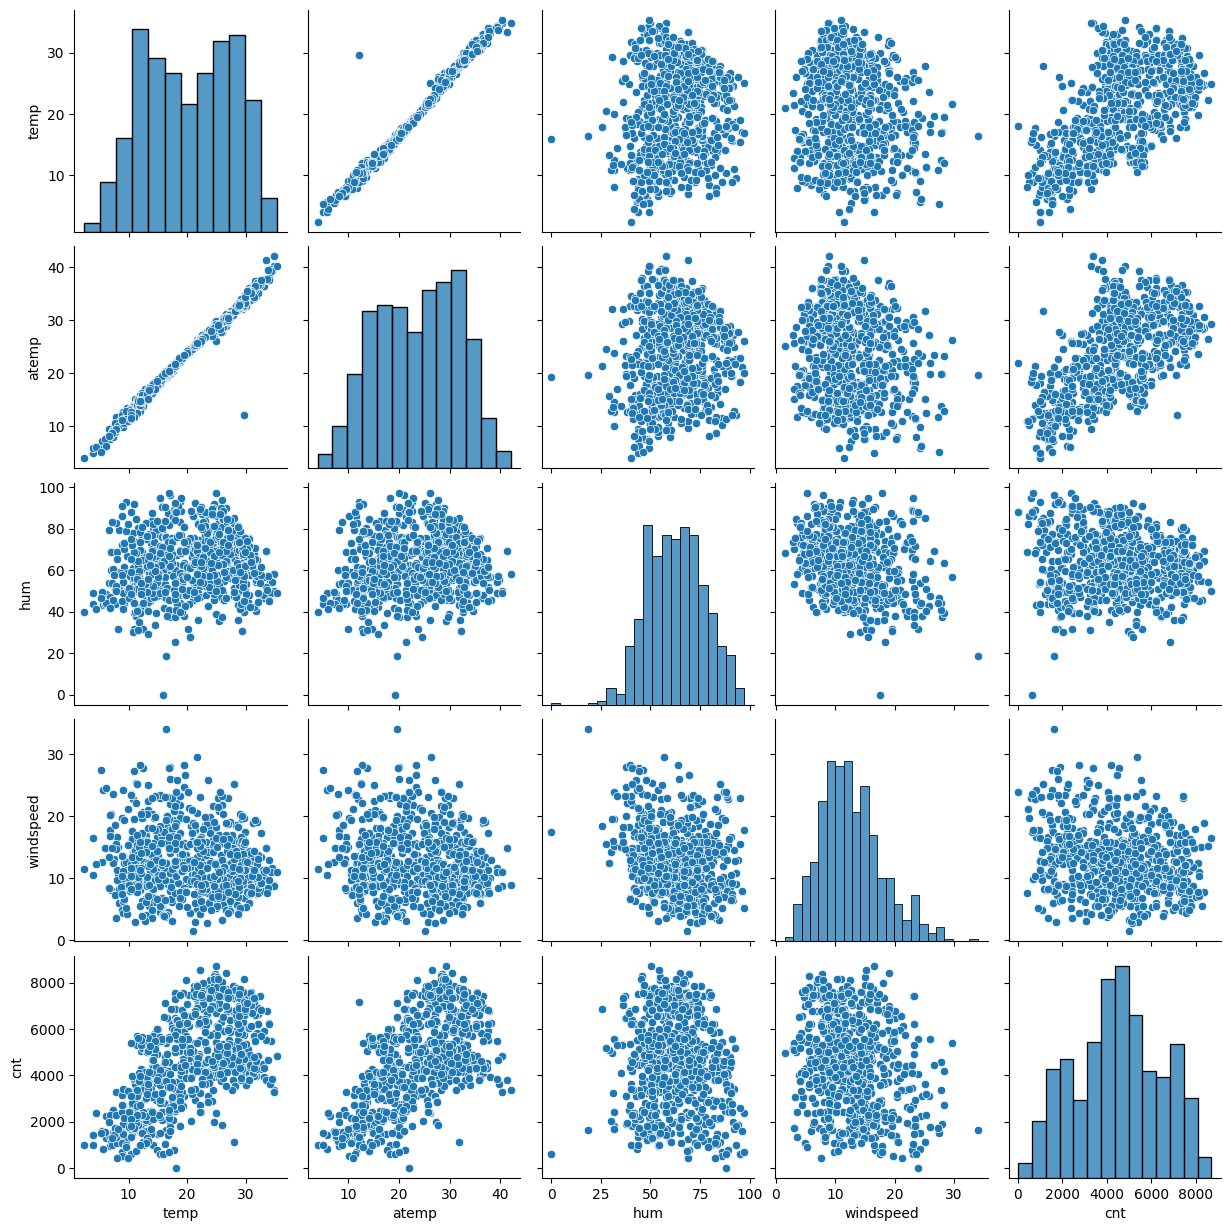

In [16]:
# Pairplot of numerical variables
sns.pairplot(data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

## Plotting Categorical Variables

Boxplots work good for Categorical variables.

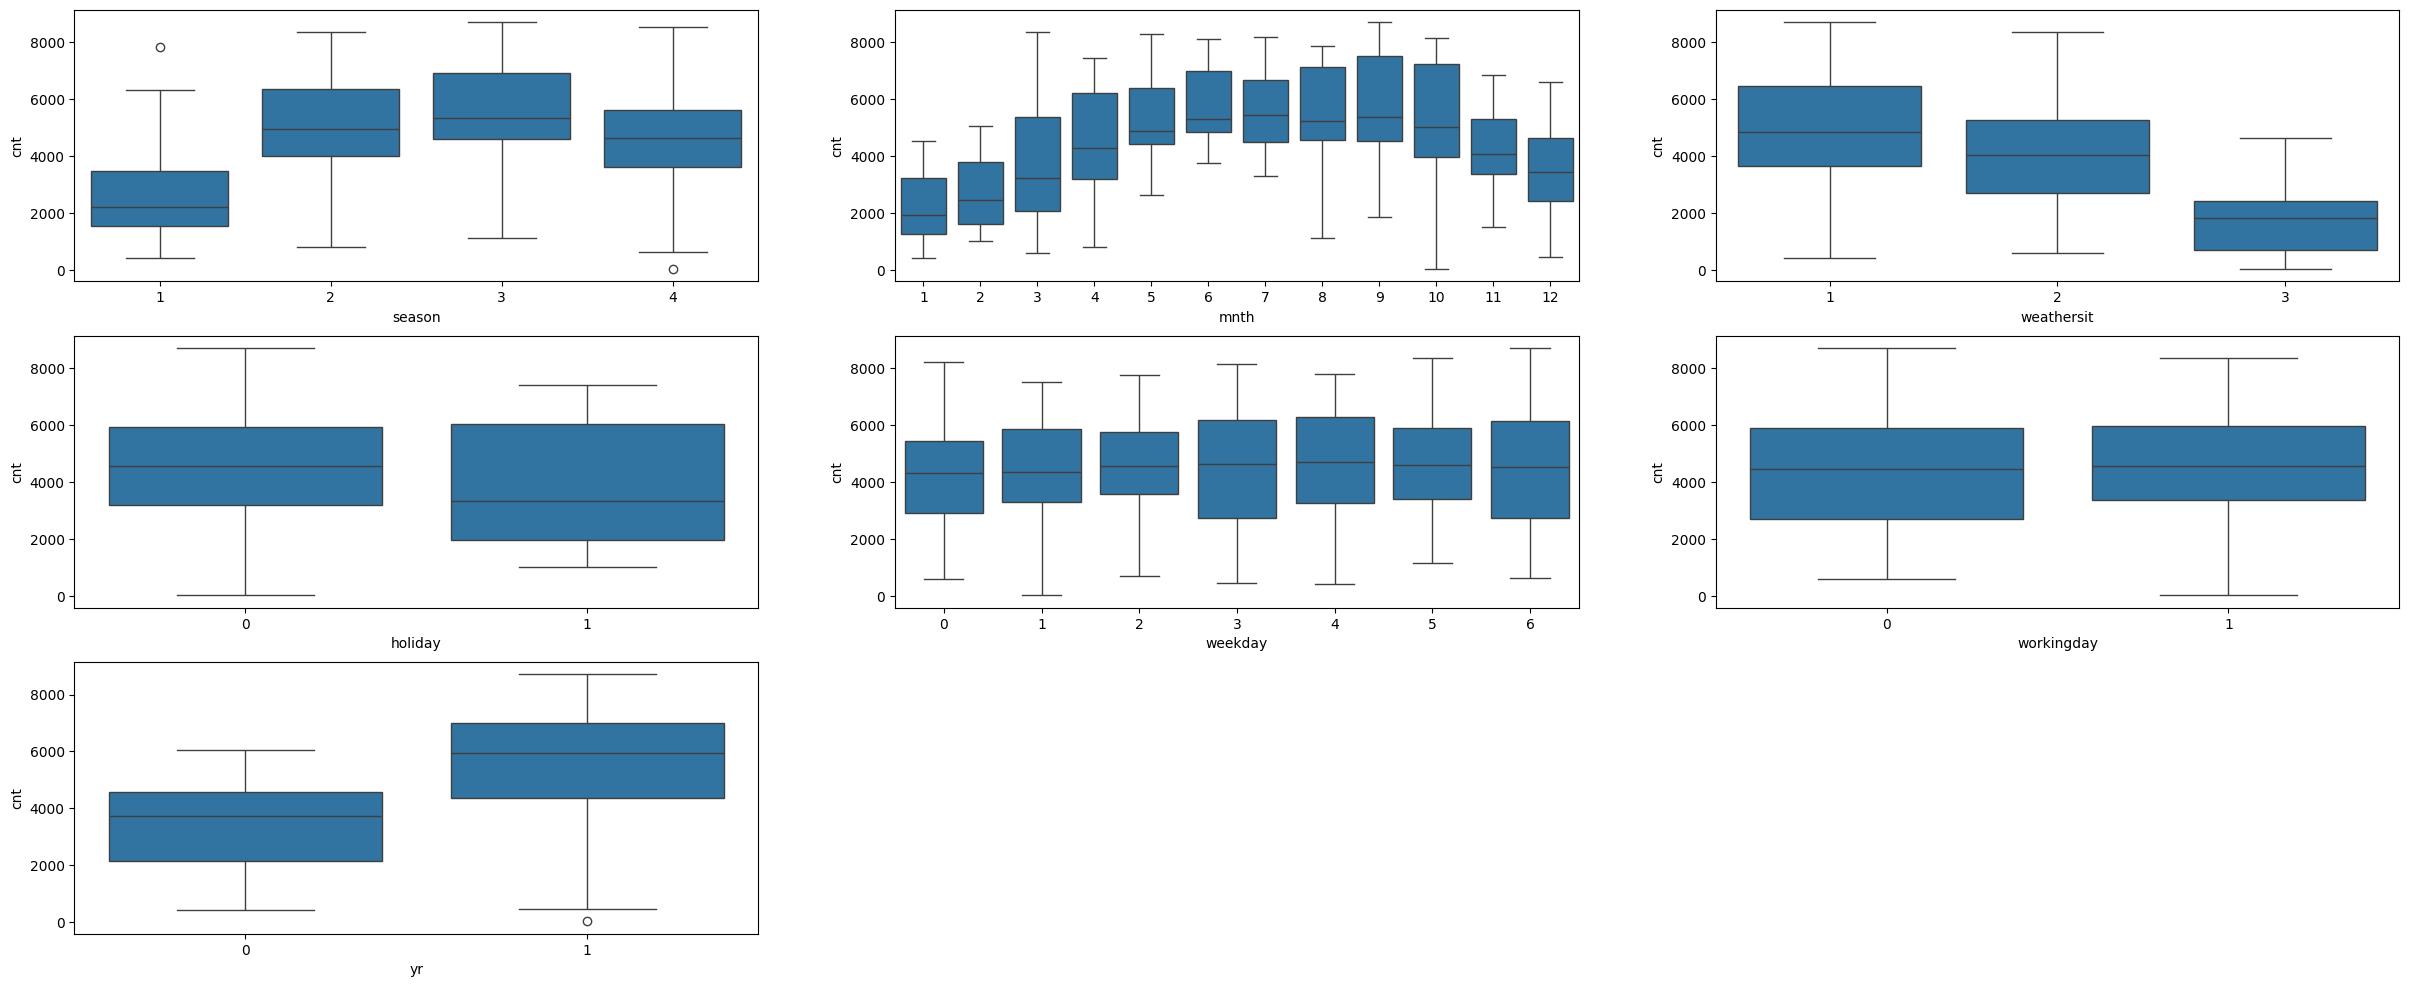

In [17]:
# Boxplot of categorical variables

plt.figure(figsize=(30, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.show()

In [ ]:
# Data Encoding

data.season = data.season.apply(lambda x: "Spring" if (x==1) else "Summer" if (x==2) else "Fall" if (x==3) else "Winter")
data.weathersit = data.weathersit.apply(lambda x: "clear" if (x==1) else "mist" if (x==2) else "light" if (x==3) else "raining")

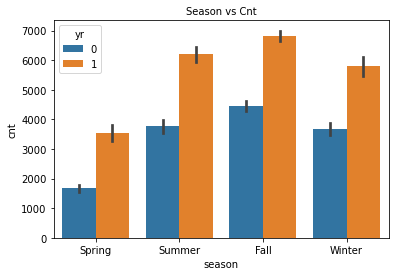

In [136]:
# Let us compare Bike Shares comparisons for both years
ax = sns.barplot(data=data, x="season", y="cnt", hue="yr")
ax.set_title("Season vs Cnt", fontsize=10)
plt.show()

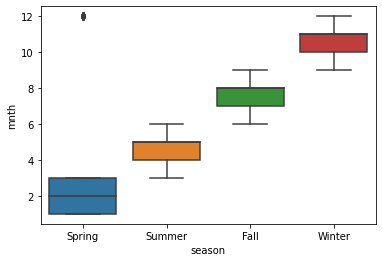

In [137]:
# Boxplots for Bike Shares in the four seasons
sns.boxplot(x = 'season', y = 'mnth', data = data)
plt.show()

## Dropping unwanted columns and encoding data

In [138]:
# Dropping month and weekday
data.drop(['mnth', 'weekday'], axis = 1, inplace = True)

In [141]:
season = pd.get_dummies(data['season'])
season.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [142]:
season_dummy = pd.get_dummies(data.season, drop_first=True)
season_dummy.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [143]:
data = pd.concat([data, season_dummy], axis=1)
data.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,0,0,mist,14.11,18.18,80.58,10.75,985,1,0,0
1,Spring,0,0,0,mist,14.90,17.69,69.61,16.65,801,1,0,0
2,Spring,0,0,1,clear,8.05,9.47,43.73,16.64,1349,1,0,0
3,Spring,0,0,1,clear,8.20,10.61,59.04,10.74,1562,1,0,0
4,Spring,0,0,1,clear,9.31,11.46,43.70,12.52,1600,1,0,0


In [144]:
data.drop(['season'], axis = 1, inplace = True)

In [145]:
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,0,0,mist,14.11,18.18,80.58,10.75,985,1,0,0
1,0,0,0,mist,14.90,17.69,69.61,16.65,801,1,0,0
2,0,0,1,clear,8.05,9.47,43.73,16.64,1349,1,0,0
3,0,0,1,clear,8.20,10.61,59.04,10.74,1562,1,0,0
4,0,0,1,clear,9.31,11.46,43.70,12.52,1600,1,0,0


In [146]:
weathersit = pd.get_dummies(data['weathersit'])
weathersit.head()

,clear,light,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [147]:
data.weathersit.value_counts()

clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [148]:
weathersit_dummy = pd.get_dummies(data['weathersit']).drop('light',axis=1)
weathersit_dummy.head()

,clear,mist
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [149]:
data = pd.concat([data, weathersit_dummy], axis=1)
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,clear,mist
0,0,0,0,mist,14.11,18.18,80.58,10.75,985,1,0,0,0,1
1,0,0,0,mist,14.90,17.69,69.61,16.65,801,1,0,0,0,1
2,0,0,1,clear,8.05,9.47,43.73,16.64,1349,1,0,0,1,0
3,0,0,1,clear,8.20,10.61,59.04,10.74,1562,1,0,0,1,0
4,0,0,1,clear,9.31,11.46,43.70,12.52,1600,1,0,0,1,0


In [150]:
data.drop(['weathersit'], axis = 1, inplace = True)


In [151]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,clear,mist
0,0,0,0,14.11,18.18,80.58,10.75,985,1,0,0,0,1
1,0,0,0,14.90,17.69,69.61,16.65,801,1,0,0,0,1
2,0,0,1,8.05,9.47,43.73,16.64,1349,1,0,0,1,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,1,0,0,1,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,1,0,0,1,0


By doing the above we one hot encode the data

## Data Preparation for Model Building

We use the 30:70 test-train split to split our data into training and testing set.

In [152]:
# Splitting Data
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [153]:
print(data_train.shape)
print(data_test.shape)

(510, 13)
(219, 13)


## Feature Scaling for Training Data
We perform Min-Max scaling and standardize data to have mean 0 and standar deviation of 1. 

In [158]:
# Scaling columns
scaler = MinMaxScaler()
num_vars = ['atemp', 'hum', 'temp', 'windspeed', 'cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [159]:
data_train.describe()
#all max is fit to 1

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,clear,mist
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.51,0.03,0.68,0.54,0.51,0.65,0.32,0.51,0.24,0.25,0.25,0.63,0.34
std,0.50,0.16,0.47,0.23,0.21,0.15,0.17,0.22,0.43,0.43,0.43,0.48,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.34,0.33,0.54,0.20,0.36,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.54,0.53,0.65,0.30,0.52,0.00,0.00,0.00,1.00,0.00
75%,1.00,0.00,1.00,0.74,0.69,0.75,0.41,0.68,0.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


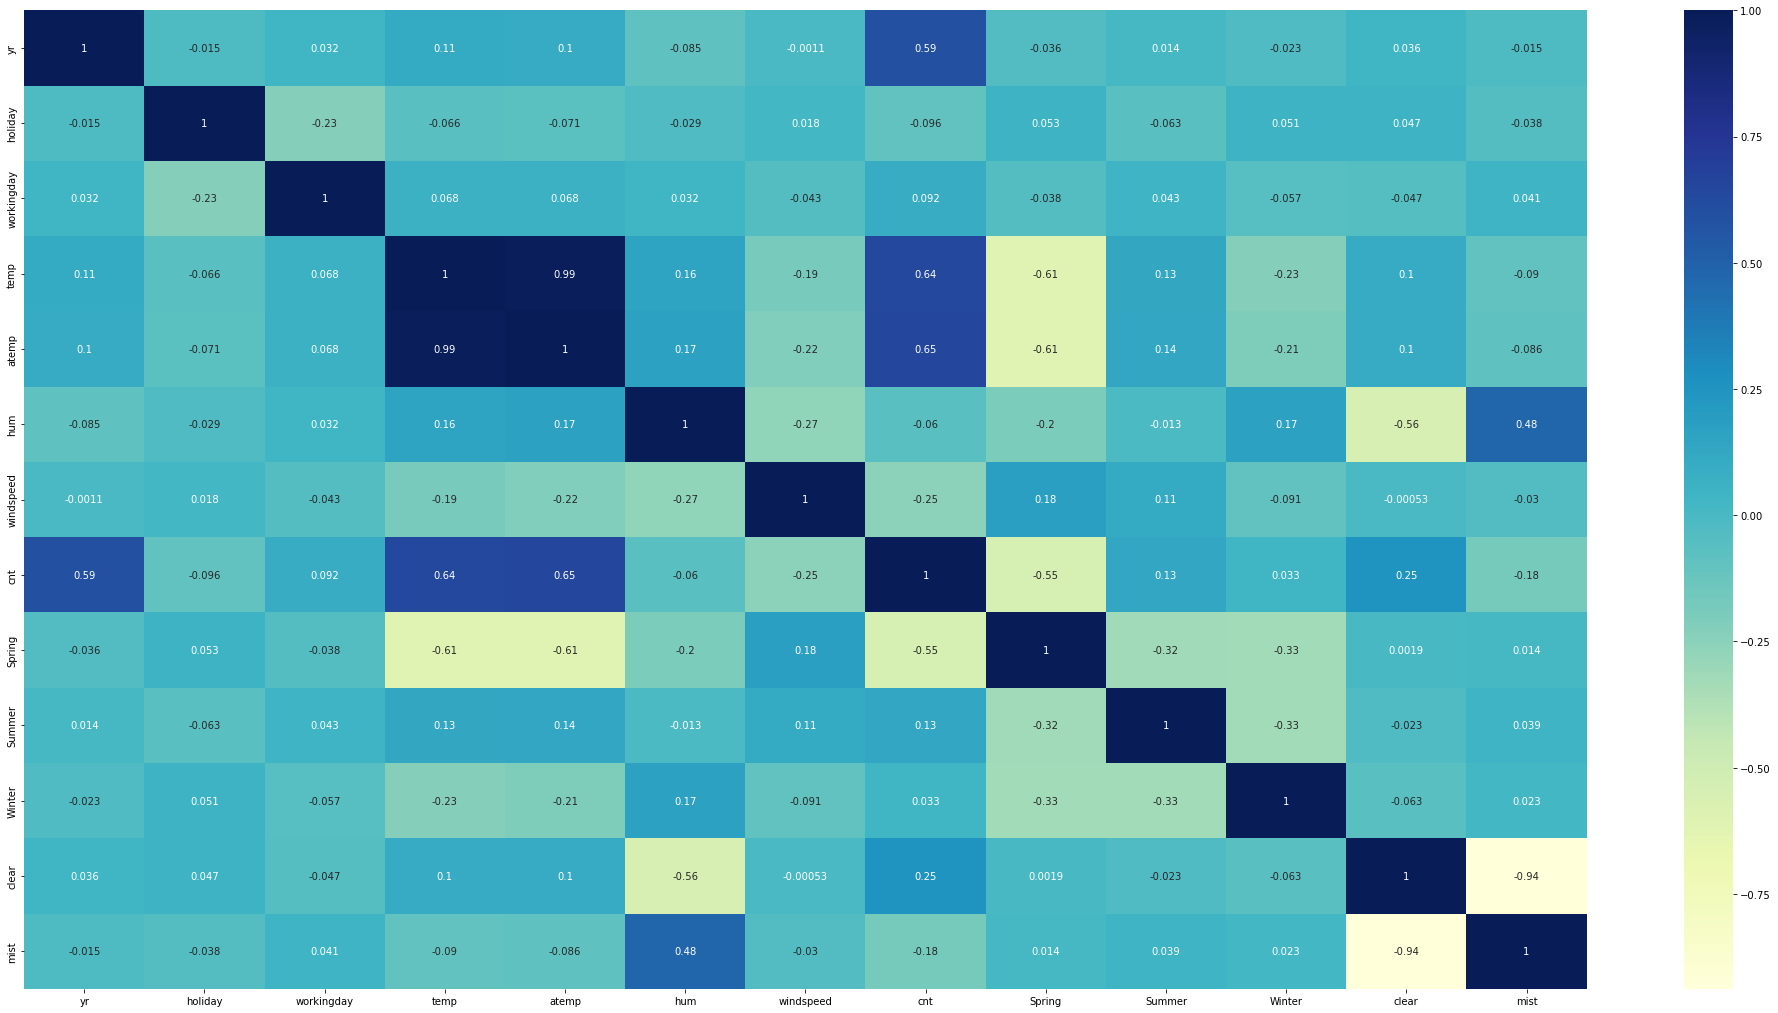

In [160]:
# Plotting Correlation Matrix 
plt.figure(figsize = (35, 18))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Model Building
We make use of Linear Regression model.

In [161]:
y_train = data_train.pop('cnt')
X_train = data_train

In [165]:
# Performing RFE on 12 months
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train)

In [166]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('clear', True, 1),
 ('mist', True, 1)]

In [167]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'clear', 'mist'],
      dtype='object')

In [168]:
# Creating X_test based on RFE ranked features
X_train_rfe = X_train[col]

In [169]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [188]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'Spring', 'Summer', 'Winter', 'clear', 'mist'],
      dtype='object')

In [189]:
X_train_new = X_train_rfe.drop(["hum","atemp","clear"], axis = 1) 

In [190]:
X_train_lm = sm.add_constant(X_train_new)

In [191]:
# Fitting our OLS Linear Regression model
lm = sm.OLS(y_train,X_train_lm).fit()

In [192]:
# Model Summary Statistics
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     198.6
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.24e-159
Time:                        20:33:51   Log-Likelihood:                 426.29
No. Observations:                 510   AIC:                            -832.6
Df Residuals:                     500   BIC:                            -790.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1966      0.034      5.793      0.0

In [ ]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'mist'],
      dtype='object')

In [194]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [ ]:
# Finding the Variance Inflation Factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.53
3,temp,4.49
2,workingday,3.15
5,Spring,2.11
0,yr,2.06
6,Summer,1.83
7,Winter,1.67
8,mist,1.51
1,holiday,1.09


## Performing Residual Analysis
To check assumption for linear regression we perform this step

In [208]:
y_train_pred = lm.predict(X_train_lm)
res = (y_train - y_train_pred)

Text(0.5, 0, 'Errors')

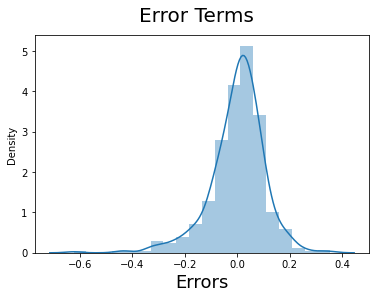

In [209]:
# Error Terms residual analysis
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From the above figure we can see that indeed the error terms are normally distributed and assumptions are justified.

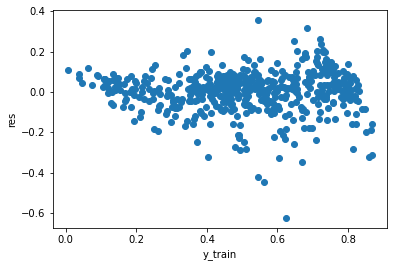

In [220]:
plt.scatter(y_train_pred,res)
plt.xlabel("y_train")
plt.ylabel("res")
plt.show()

We justify linear regression assumptions by making the above plots

## Making Predictions

In [199]:
num_vars = ['atemp', 'hum', 'temp', 'windspeed', 'cnt']
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [ ]:
# Forming x and y test sets
y_test = data_test.pop('cnt')
X_test = data_test

In [201]:
# New test set
X_test_new = X_test[X_train_new.columns]

# Adding constant variable 
X_test_new = sm.add_constant(X_test_new)

In [202]:
# Making prediction
y_pred = lm.predict(X_test_new)

## Model Evaluation
To evaluate model we first plot the predicted and test value to gauge how good the fit is

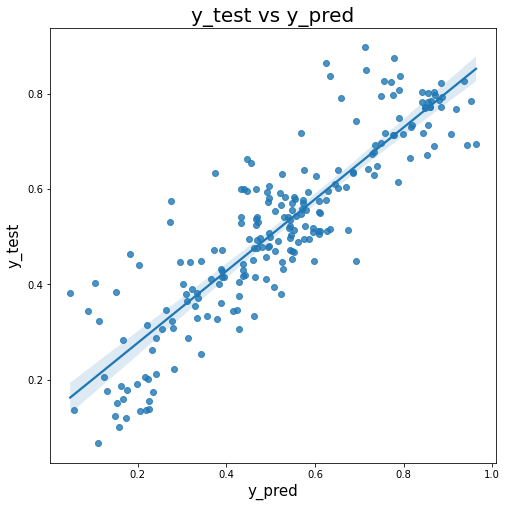

In [203]:
# Plotting the Test and Predicted values.
plt.figure(figsize=(8, 8))
Plotting = sns.regplot(x=y_test, y=y_pred )
Plotting.set_xlabel("y_pred",fontsize=15)
Plotting.set_ylabel("y_test",fontsize=15)
Plotting.set_title("y_test vs y_pred", fontsize=20)
plt.show()

## Model Evaluation using R squared and Adjusted R squared
A good model should have a high R-squared and Adjusted R-squared, indicating that a significant proportion of the variance in bike rental count is captured by the chosen features.

In [ ]:
# Model Evaluation

rsq=r2_score(y_true=y_test,y_pred=y_pred)
print(rsq)

0.7747956050422422

In [18]:
n = X_test.shape[0]
p = X_test.shape[1]

# Finding Adjusted R squared value

rsq_a = 1-(1-rsq)*(n-1)/(n-p-1)
print(rsq_a)

0.7616769024233437


In [ ]:
# Model Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     198.6
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.24e-159
Time:                        20:33:53   Log-Likelihood:                 426.29
No. Observations:                 510   AIC:                            -832.6
Df Residuals:                     500   BIC:                            -790.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1966      0.034      5.793      0.0

## Conclusions :

- Temperature is the most influential variable on the count of bike rentals, with the highest coefficient value.
- Over the years, there is a consistent increase in bike rental count.
- September stands out as the month with the highest count of bike rentals.
- Light snow and windspeed have negative coefficient values, indicating a decrease in bike rentals as these conditions worsen.

### We find the equation to be :

cnt = 0.1966 + (yr x 0.2392) + (holiday × -0.0655) + (workingday x 0.0146) + (temp x 0.4785) + (windspeed x -0.1814) + (Spring x -0.0718) + (Summer x 0.0430) + (Winter x 0.0696) + (mist x -0.0640)